In [22]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [32]:
def loadYoloModel():
    model = YOLO("yolo11n_best.pt")
    return model

In [33]:
model = loadYoloModel()


0: 704x864 (no detections), 228.2ms
Speed: 50.9ms preprocess, 228.2ms inference, 1.3ms postprocess per image at shape (1, 3, 704, 864)


/var/folders/vt/cggblq8j1gg3s0lvzv4m1chw0000gn/T/ipykernel_87391/2115645553.py:41: RuntimeWarning: invalid value encountered in cast
  plt.imshow(overlay.astype(np.uint8))


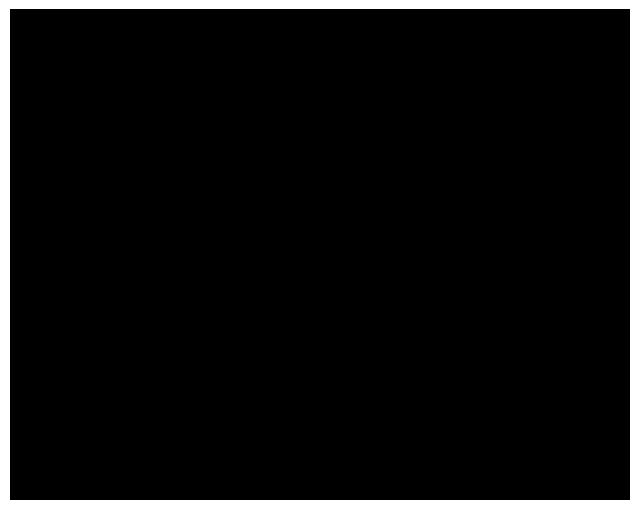

In [36]:
# --------------------------
# 2) TIFF mit PIL laden (zuverlässiger als cv2)
# --------------------------
img_path = "ausgabe_ndvi_20.tif"
pil_img = Image.open(img_path)

# In NumPy umwandeln
img = np.array(pil_img)

# --------------------------
# 3) Sicherstellen, dass YOLO ein 3-Kanal Bild bekommt
# --------------------------
if img.ndim == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Falls mehr als 3 Kanäle vorhanden sind (z.B. RGBA, multispektral)
if img.ndim == 3 and img.shape[2] > 3:
    img = img[:, :, :3]

# --------------------------
# 4) Prediction ausführen
# --------------------------
results = model.predict(
    source=img,
    save=False,
    imgsz=864
)
r = results[0]
overlay = img.copy()

if r.masks is not None:
    masks = r.masks.data.cpu().numpy()

    for m in masks:
        color = np.random.randint(0, 255, size=3)
        overlay[m > 0.5] = (
            0.6 * overlay[m > 0.5] + 0.4 * color
        )

plt.figure(figsize=(8, 8))
plt.imshow(overlay.astype(np.uint8))
plt.axis("off")
plt.show()

In [37]:
# --------------------------
# 2) TIFF mit PIL laden (zuverlässiger als cv2)
# --------------------------
img_path = "ausgabe_ndvi_20.tif"
pil_img = Image.open(img_path)

# In NumPy umwandeln
img = np.array(pil_img)

# --------------------------
# 3) Sicherstellen, dass YOLO ein 3-Kanal Bild bekommt
# --------------------------
if img.ndim == 2:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Falls mehr als 3 Kanäle vorhanden sind (z.B. RGBA, multispektral)
if img.ndim == 3 and img.shape[2] > 3:
    img = img[:, :, :3]

# --------------------------
# 4) Prediction ausführen
# --------------------------
results = model.predict(
    source=img,
    save=False,
    imgsz=864
)


print(results)

# --------------------------
# 5) Masken visualisieren
# --------------------------
result = results[0]

masked_img = img.copy()

if result.masks is not None:
    for mask in result.masks.data:
        m = mask.cpu().numpy()
        masked_img[m > 0.5] = [255, 0, 0]  # rote Überlagerung

    cv2.imwrite("prediction_masked.png", cv2.cvtColor(masked_img, cv2.COLOR_RGB2BGR))
    print("Maske gespeichert als prediction_masked.png")
else:
    print("Keine Masken erkannt.")


0: 704x864 (no detections), 252.4ms
Speed: 42.3ms preprocess, 252.4ms inference, 10.2ms postprocess per image at shape (1, 3, 704, 864)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Mauseschaden'}
obb: None
orig_img: array([[[          0,           0,           0],
        [          0,           0,           0],
        [          0,           0,           0],
        ...,
        [          0,           0,           0],
        [          0,           0,           0],
        [          0,           0,           0]],

       [[          0,           0,           0],
        [          0,           0,           0],
        [          0,           0,           0],
        ...,
        [          0,           0,           0],
        [          0,           0,           0],
        [          0,           0,           0]],

       [[          0,           0,           0],
        [    